In [5]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import os
sns.set(rc = {'figure.figsize':(15,8)}, font_scale = 1.5)

In [6]:
def format_df(df):
    df = df.iloc[1:]
    df = df[df.columns[1:]]
    # format name
    col_names = df.columns.to_list()
    col_names[0] = 'clip'
    df.columns = col_names
    df = df[[col_names[0]] + col_names[2:]]
    df = df.set_index('clip')
    return df

In [7]:
def get_df(path):
    dfs = pd.read_excel(path, sheet_name=None)
    dfs = {k: format_df(v) for k, v in dfs.items() if k != 'summary'}
    return dfs

In [8]:
root = '/home/csvt32745/matte/MaskPropagation/vm108_val_midtri_1024x576'
targets = [
    'STCNFuseMatting_fullres_matnaive',
    # 'OTVM',
    # 'STCNFuseMatting_fullres_480_none_temp_seg',
    'STCNFuseMatting_fullres_matnaive_none_temp_seg',
]
df_list = [get_df(os.path.join(root, t, t+".xlsx")) for t in targets]

In [9]:
def plot(idx, metric, df_list, name_list, path=None):
    plt.clf()
    data = {name: df[metric].iloc[idx] for df, name in zip(*[df_list, name_list])}
    avg = {name: df.mean(0) for name, df in data.items()}
    # print(avg)
    sns.lineplot(data=data)
    name = df_list[0][metric].index[idx]
    plt.title(metric + "\n" + name, fontsize = 20, y=1.04)
    
    plt.suptitle('\n'.join([f"{k}: {v:.4f}" for k, v in avg.items()]), 
    fontsize=25, x=0.68, y=0.05, horizontalalignment='right')
    if path is not None:
        plt.savefig(os.path.join(path, name+'.png'), format='png', bbox_inches='tight')

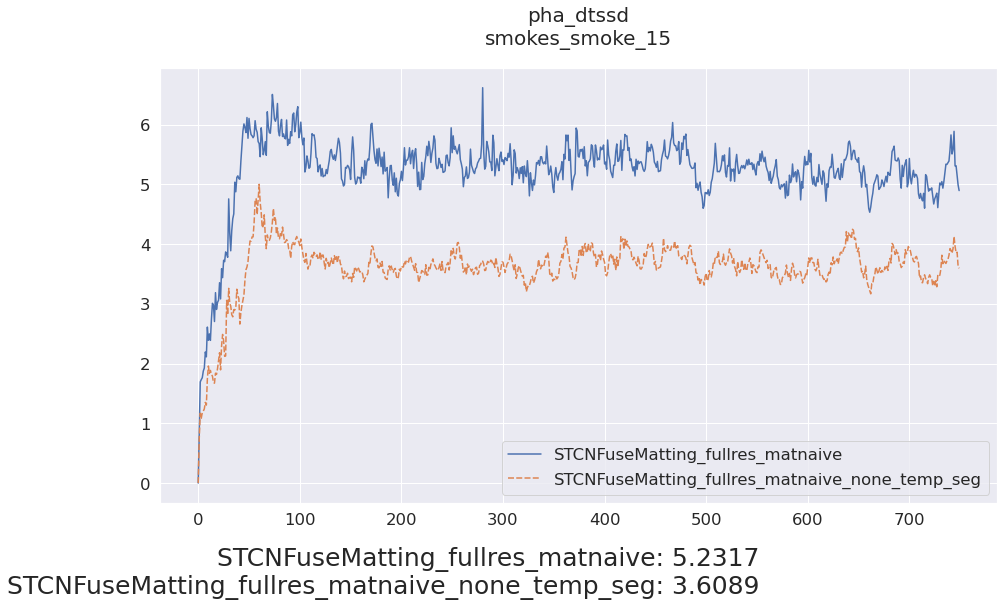

In [10]:
# for metric in df_list[0].keys():
# for i in 
# plot()
# metric = 'pha_mse'
metric = 'pha_dtssd'
# metric = 'pha_mad'
root = 'timeline_scores_vs_otvm'
path = os.path.join(root, metric)
os.makedirs(path, exist_ok=True)
for i in range(df_list[0][metric].shape[0]):
    plot(i, metric, df_list, targets, path=path)

In [11]:
# plot(0, 'pha_mad', df_list, targets)